<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/Friday_completed_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'COMPLETE DATA SET 2 (1).csv'
data = pd.read_csv(file_path)

# Inspect the first few rows
print(data.head())
print(data.info())

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")


           0          1          2          3          4          5  \
0  38.274353  38.274353  38.274353  38.274353  38.274353  38.274353   
1  60.743327  58.374448  52.307200  43.167179  37.306176  39.377123   
2  35.598535  30.805204  25.624235  21.627399  19.019032  18.516897   
3  25.595452  23.208748  22.575827  22.156338  20.145037  15.588119   
4  38.042662  42.871367  42.081415  35.981881  28.191039  18.636240   

           6          7          8          9  ...      2082      2083  \
0  38.274353  38.274353  38.274353  38.274353  ...  0.000068  0.000044   
1  33.675893  23.270452  26.359007  29.186764  ...  0.000149  0.000099   
2  16.391426  14.156888  16.742159  18.522038  ...  0.000105  0.000079   
3  12.127479  11.763777  12.586168  11.047582  ...  0.000061  0.000039   
4  13.543053  13.268878  13.004368  16.247301  ...  0.000162  0.000124   

       2084      2085      2086      2087      2088      2089  Type  Label  
0  0.000020 -0.000005 -0.000029 -0.000053 -0.000077

**`**Data type And Null **`**

In [2]:
print(data.dtypes)

print(data.isnull().sum())

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
2087     float64
2088     float64
2089     float64
Type      object
Label     object
Length: 2092, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
2087     0
2088     0
2089     0
Type     0
Label    0
Length: 2092, dtype: int64


**Training And Test data shape**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming the last column is the label and the others are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Encode labels (if they are categorical)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Reshape X if necessary (e.g., to 2D or 3D for CNN input)
# Assuming each sample is a signal that needs to be reshaped for CNN
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training data shape:", y_train.shape)
print("Test data shape:", y_test.shape)

Training data shape: (245, 2091, 1)
Test data shape: (62, 2091, 1)
Training data shape: (245,)
Test data shape: (62,)


**Model Building and Compilation**

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 2088, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 1044, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 1042, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 521, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 519, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 259, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 33152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,243,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,274,753 (16.31 MB)

 Trainable params: 4,274,753 (16.31 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training and Evaluation**

In [18]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Assuming X and y are already defined as the feature matrix and labels

# Step 1: Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Step 2: Define the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Step 5: Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Step 6: Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6554 - loss: 0.9274 - val_accuracy: 0.8548 - val_loss: 0.6986
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8106 - loss: 0.4152 - val_accuracy: 0.9839 - val_loss: 0.2016
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9944 - loss: 0.1486 - val_accuracy: 0.9194 - val_loss: 0.1499
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9692 - loss: 0.0807 - val_accuracy: 0.9839 - val_loss: 0.1043
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 1.0000 - loss: 0.0389 - val_accuracy: 0.9839 - val_loss: 0.0777
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 1.0000 - loss: 0.0225 - val_accuracy: 0.9677 - val_loss: 0.0734
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 1.0000 - loss: 0.0170 - val_accuracy: 0.9839 - val_loss: 0.0533
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 0.046

***Training and Validation ***

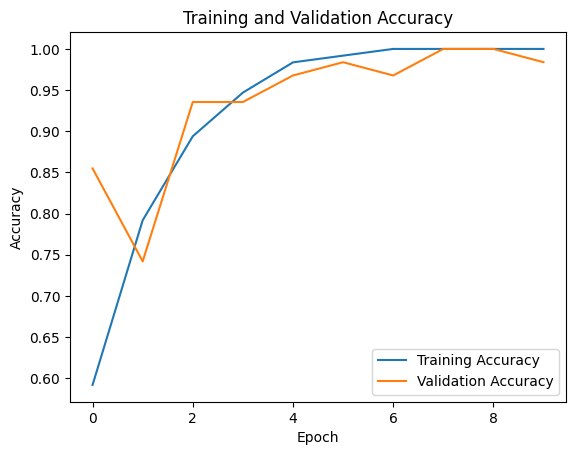

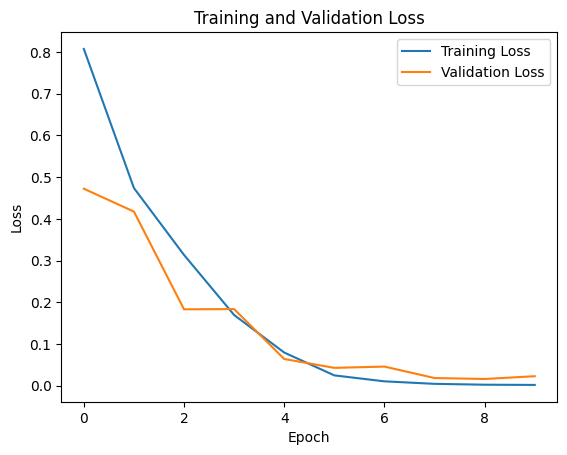

In [16]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**confusion_matrix**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


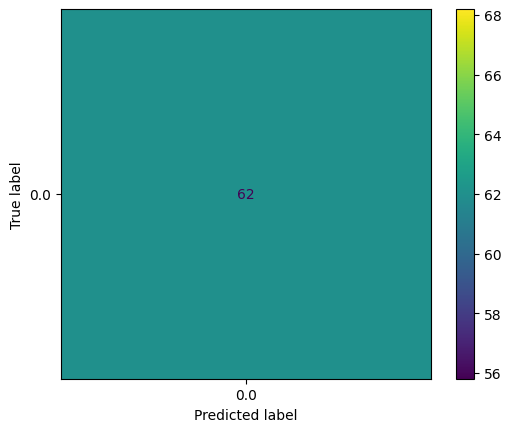

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int64")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()

# Show the confusion matrix
import matplotlib.pyplot as plt
plt.show()


In [15]:
from scipy.fft import fft
from sklearn.model_selection import train_test_split
import numpy as np

# Assume X is your feature matrix and y contains labels

# 1. Apply FFT to each signal in the dataset
# Convert each signal in X using FFT and take the magnitude (absolute value)
X_fft = np.abs(np.array([fft(signal) for signal in X]))

# 2. Split the FFT-processed data into training and testing sets
X_train_fft, X_test_fft, y_train, y_test = train_test_split(X_fft, y, test_size=0.2, random_state=64)

# 3. Output the shapes of the processed data
X_train_fft.shape, X_test_fft.shape


((245, 2091, 1), (62, 2091, 1))

In [19]:
# Example: Predict on a new signal (assuming you have new data)
new_signal = X_val[0].reshape(1, -1, 1)  # Reshape a validation signal for prediction
prediction = model.predict(new_signal)

if prediction < 0.5:
    print("Predicted class: HF (Normal Skin Fibroblasts)")
else:
    print("Predicted class: ZAM (Tumor Associated Fibroblasts)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted class: HF (Normal Skin Fibroblasts)
